Numpy and Linear Algebra
=====

Some of the code contained within this notebook is from Ch. 4 of *Data Science from Scratch* by J. Grus.



Linear Algebra is a branch of mathematics that looks at linear equations, functions of linear equations and there representations.

$$ a_1 x_1 + a_2 x_2 + ... + a_n x_n = b $$

These equations can be represented in matrices.  

Our primary interest in linear algebra stems from the fact that several of the machine learning and data mining algorithms we will look at can be implemented in terms of matrix operations.  


Python has access to a very good module for numerical calculations and working the vectors and matrices.  It is called numpy.

In [1]:
import numpy as np

print np.version


<module 'numpy.version' from '/usr/local/lib/python2.7/dist-packages/numpy/version.pyc'>


## Vectors

Practically speaking, a vector present a way for use to group related data together.  As an example, we could characterize a person by their age, weight and height and store this data in a vector.  

In [2]:
import numpy as np

person = np.array([72, 200, 28])

print person, type(person), person.shape

[ 72 200  28] <type 'numpy.ndarray'> (3,)


The vector is a point in a space.  

(-1, 100)

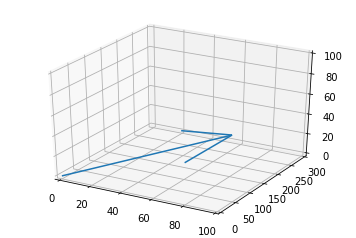

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver([0], [0], [0], [person[0]], [person[1]], [person[2]])
ax.set_xlim([-1, 100])
ax.set_ylim([-1, 300])
ax.set_zlim([-1, 100])

We can define vectors in numpy by creating from a list or using `np.zeros` or `np.ones` with the appropriate shape. 

In [6]:
a = np.array([1,2,3,4])
b = np.ones((4,))
c = np.zeros((4,), dtype = np.int) # You can specify the type as well.  

print a, b, c

[1 2 3 4] [1. 1. 1. 1.] [0 0 0 0]


Vectors can be multplied by a scalar, added together or multiplied together, provided the dimensions align.  Numpy supports all of these operations.

In [7]:
print "a + b:", a + b
print "2 * a:", 2 * a
print "a . b:", np.dot(a, b)

a + b: [2. 3. 4. 5.]
2 * a: [2 4 6 8]
a . b: 10.0


## Matrices

In numpy, it is possible to create matrices by specifying the number and size of the dimensions with a tuple.

In [8]:
A = np.zeros((2, 2))
B = np.ones((3,2))

print A, "\n", B

[[0. 0.]
 [0. 0.]] 
[[1. 1.]
 [1. 1.]
 [1. 1.]]


It is also possible to create matrices from lists.

In [10]:
C = np.array([1,2,3])
D = np.array([[1,2], [3,4]])

print C, "\n", D

[1 2 3] 
[[1 2]
 [3 4]]


Element access, shape and slicing.  These should look similiar to Python's built-in lists.  

In [13]:
Ea = np.array(range(1,10))
Eb = Ea.reshape((3,3))

print Ea, '\n', Eb

E = np.array(range(1,10)).reshape((3,3))

print E
print "E.shape", E.shape
print "E[1,0]", E[1,0]

# Slicing works as well
print E[:2,:2]

[1 2 3 4 5 6 7 8 9] 
[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]
E.shape (3, 3)
E[1,0] 4
[[1 2]
 [4 5]]


Numpy supports matrix operations.

In [14]:
A = np.matrix(range(6)).reshape((2,3))
B = np.matrix(range(4)).reshape((2,2))
C = np.ones((2,2))

print A
print B
print C

print B + C
print np.dot(B, A) # or B * A

[[0 1 2]
 [3 4 5]]
[[0 1]
 [2 3]]
[[1. 1.]
 [1. 1.]]
[[1. 2.]
 [3. 4.]]
[[ 3  4  5]
 [ 9 14 19]]


As an illustration of how we would use graphs to store data.  Imagine that we have 3 exam scores per person in a class of 5 students.  This data could be stored in a matrix.  Each row represents the scores of one student and the column will reprsent the scores for one exam.  

In [15]:
student_1 = [35, 73, 53]
student_2 = [87, 92, 88]
student_3 = [83, 23, 100]
student_4 = [90, 91, 92]
student_5 = [85, 95, 75]

exam_scores = np.matrix([student_1, student_2, student_3, student_4, student_5])

print exam_scores


[[ 35  73  53]
 [ 87  92  88]
 [ 83  23 100]
 [ 90  91  92]
 [ 85  95  75]]


Most operations we would like to perform are already implemented in numpy.  Consider the tasks of finding the highest exam score per student, highest exam score per exam, average exam score per student and average exam score per exam.

In [16]:
print "Max exam score by student:"
print np.amax(exam_scores, axis=1)
print "Max Exam score by exam:", np.amax(exam_scores, axis=0)
print "Avg exam score by student:"
print np.mean(exam_scores, axis=1)
print "Avg exam score by exam:", np.mean(exam_scores, axis=0)

print "Max of all exam scroes:", np.amax(exam_scores)
print "Avg of all exam scores:", np.mean(exam_scores)

Max exam score by student:
[[ 73]
 [ 92]
 [100]
 [ 92]
 [ 95]]
Max Exam score by exam: [[ 90  95 100]]
Avg exam score by student:
[[53.66666667]
 [89.        ]
 [68.66666667]
 [91.        ]
 [85.        ]]
Avg exam score by exam: [[76.  74.8 81.6]]
Max of all exam scroes: 100
Avg of all exam scores: 77.46666666666667


As an example of how this type of data respentation can be useful when applying a function to all of the data, imagine that the third exam was a final and was weighted more than the first two.  To calculate the weighted average of the exams, we could multiply the first two exams by .25 and the third by .5.  

In [17]:
#weights = np.array([0.25, 0.25, 0.5])
weights = np.matrix([[0.25], [0.25], [0.5]])
print np.dot(exam_scores, weights)

[[53.5 ]
 [88.75]
 [76.5 ]
 [91.25]
 [82.5 ]]


## Graphs

One use of a matrix is to represent a graph.  There is a row and column for each vertex in the graph and if an edge is present between the ith and jth vertices then there is a 1 in the i, j entry, otherwise a 0 is present.

In [24]:
import numpy as np

friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
               (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

# Create an adjacency matrix from this list of edges
F = np.zeros((10,10))

for i, j in friendships:
    F[i, j] = 1
    F[j, i] = 1

print F

# List the friends of each person

for i, r in enumerate(F):
    print i, ": ", 
    print [j for j, x in enumerate(r) if x == 1]
    

[[0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
0 :  [1, 2]
1 :  [0, 2, 3]
2 :  [0, 1, 3]
3 :  [1, 2, 4]
4 :  [3, 5]
5 :  [4, 6, 7]
6 :  [5, 8]
7 :  [5, 8]
8 :  [6, 7, 9]
9 :  [8]


There are some datasets that serve as benchmark for commonly studied tasks.  One task is digit recognition.  `sklearn` as a simple digit dataset that we can look at.    

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0
[[ 0.  0.  0.  4. 15. 12.  0.  0.]
 [ 0.  0.  3. 16. 15. 14.  0.  0.]
 [ 0.  0.  8. 13.  8. 16.  0.  0.]
 [ 0.  0.  1.  6. 15. 11.  0.  0.]
 [ 0.  1.  8. 13. 15.  1.  0.  0.]
 [ 0.  9. 16. 16.  5.  0.  0.  0.]
 [ 0.  3. 13. 16. 16. 11.  5.  0.]
 [ 0.  0.  0.  3. 11. 16.  9.  0.]]
2


<Figure size 432x288 with 0 Axes>

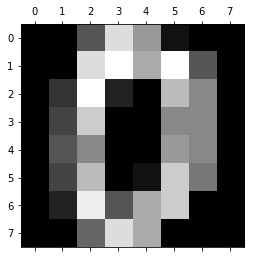

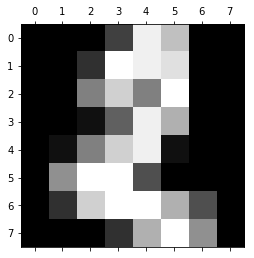

In [32]:
from sklearn.datasets import load_digits

digits = load_digits()
data = digits["data"]
targets = digits["target"]

# print data, type(data), data.shape
# print targets, type(targets), targets.shape

print data[0,:].reshape((8,8))
print targets[0]

print data[2,:].reshape((8,8))
print targets[2]

import matplotlib.pyplot as plt
plt.gray()
plt.matshow(data[0,:].reshape((8,8)))
plt.matshow(data[2,:].reshape((8,8)))

This image data along with the label data can be fed into a supervised machine learning method to learn to classify images.  See [Image Classification in 10 Minutes with MNIST Dataset](https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d) if you want to peek ahead. 